# Gradient Descent

Gradient Descent is a fundamental optimization algorithm used in machine learning and optimization to minimize a function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient.

#### Minimizing a Function
 - Gradient Descent is used to find the minimum of a given function. In the context of machine learning, this function is often a cost function or an error function that measures how far off our model's predictions are from the actual values.
 
#### Iterative Process
 - It's an iterative process where, starting from some initial point in the function's domain, the algorithm repeatedly takes steps in the direction that minimizes the function. These steps are determined by the gradient of the function.
 
####  Negative Gradient Direction
 - The gradient of a function is a vector that points in the direction of the function's steepest increase. By taking the negative of the gradient, Gradient Descent moves in the direction of the steepest decrease.
 
#### Step Size (Learning Rate)
 - Along with the direction given by the negative gradient, the size of each step taken is determined by a parameter called the learning rate. This controls how large the steps are in each iteration.
 
#### Convergence
 - Gradient Descent continues this process iteratively until it reaches a point where the algorithm converges, either finding a minimum or getting close enough to a minimum based on predefined conditions (e.g., reaching a certain tolerance level).
 
##### Terrain Example
Imagine standing on a hilly terrain blindfolded and trying to find the lowest point by feeling the slope under your feet. You take small steps downhill guided by the slope until you sense no further descent, indicating you might have reached the bottom of the valley.

Gradient Descent is powerful but might have challenges like choosing the right learning rate (step size), avoiding local minima (getting stuck in suboptimal solutions), or dealing with high-dimensional spaces efficiently.

In essence, Gradient Descent is the backbone of many optimization algorithms in machine learning, allowing models to iteratively improve by minimizing errors or costs, ultimately enhancing their predictive capabilities.
 


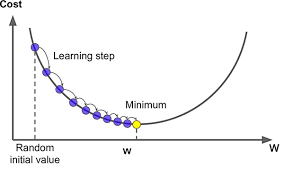

## Minimizing a Single Variable Function

To grasp gradient descent, we'll begin by importing specific Python libraries and establishing a basic function with just one variable.

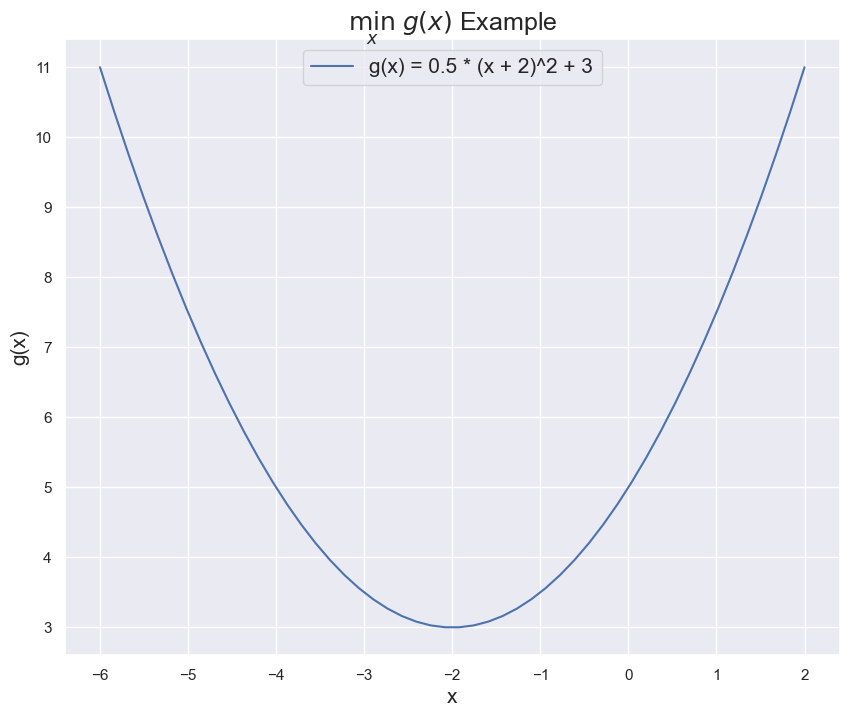

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set Seaborn theme for plots
sns.set_theme()

# Define a new test function for experimenting (quadratic function)
def g(x):
    return 0.5 * (x + 2)**2 + 3  # Example: Quadratic function

# Define domain variables for plotting g
domain = np.linspace(-6, 2, 50)

# Plot the function g(x)
plt.figure(figsize=(10, 8))
plt.plot(domain, g(domain), label="g(x) = 0.5 * (x + 2)^2 + 3")  
plt.xlabel("x", fontsize=15)
plt.ylabel("g(x)", fontsize=15)
plt.legend(fontsize=15, loc="upper center")
plt.title("$\min_x$ $g(x)$ Example", fontsize=18)
plt.show()

## The Problem Description

Clearly the function $g(x) = \frac{1}{2} (x + 2)^2 + 3$ has a global minimum at $g(x) = 3$ occuring at $x = -2$. If the solution isn't known beforehand, how might we determine it? 

### Start with a Guess

Suppose we first guess that the minimum value of $g(x)$ occurs at $x_0 = 1$. We can visualize the point $(1,g(1))$ by running the following code in the cell below:

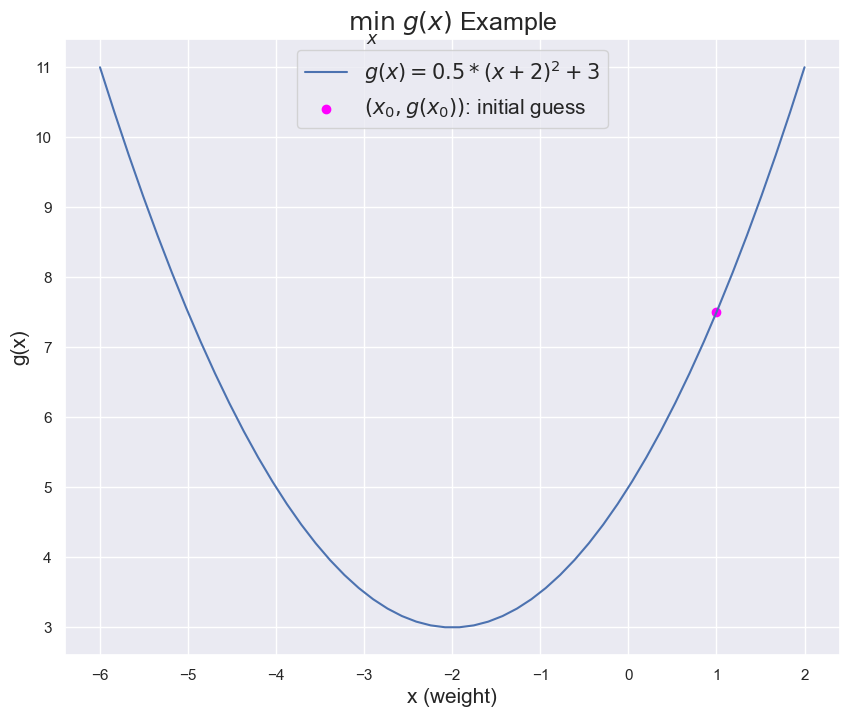

In [2]:
plt.figure(figsize = (10, 8))
plt.plot(domain, g(domain), label = "$g(x) = 0.5 * (x + 2)^2 + 3$")
plt.scatter([1], [g(1)], color = "magenta", label = "$(x_0, g(x_0))$: initial guess")
plt.xlabel("x (weight)", fontsize = 15)
plt.ylabel("g(x)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title("$\min_x$ $g(x)$ Example", fontsize = 18)
plt.show()

### The General Idea

The fundamental concept of gradient descent involves utilizing the gradient (or derivative in the case of single-variable functions) to indicate a direction for exploration. This property makes gradient descent a first-order method.

For example, with our function $g(x)$ and initial guess $x_0=1$, suppose we are able to calculate the value of the gradient (the derivative) of $g(x)$ at $x_0=1$. This numerical value will give us the slope of the tangent line to $g(x)$ at $x_0=1$. The derivative is $g'(x)=x+2$.

We're able to create a visual representation of this tangent line using the code provided in the cell below.

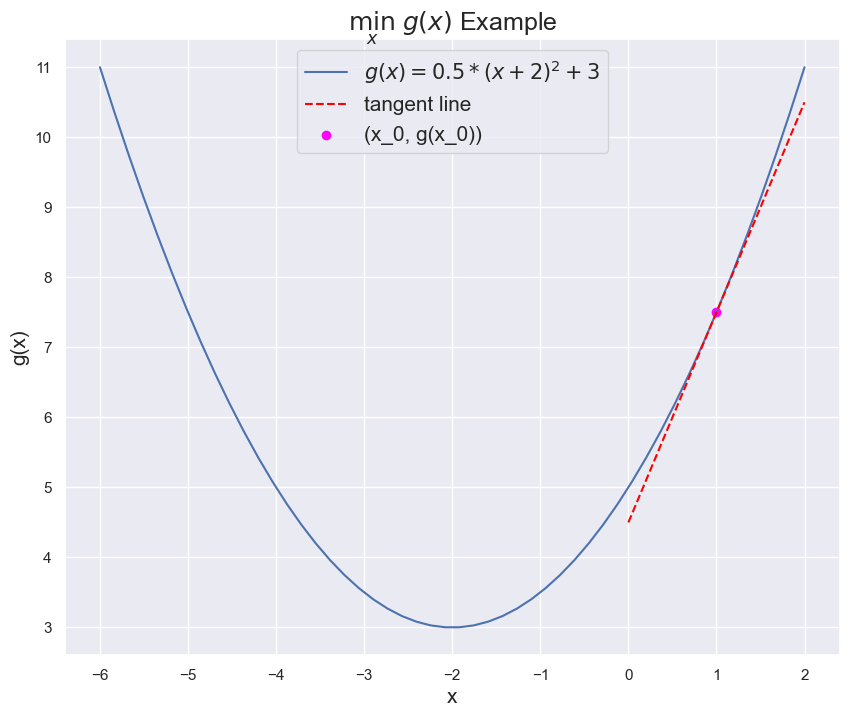

In [3]:
# Define function derivative g'(x)
def dg(x):
    return x + 2

# Choose x_0
x_0 = 1.0

# Define tangent line function for visualization
def tangent_line(x_i, function, derivative, i=0, color="magenta", show=True):
    """
    Visualize the tangent line to a given function at a specific point.

    Parameters:
    - x_i (float): The x-coordinate of the point where the tangent line is drawn.
    - function (callable): The function for which the tangent line is calculated.
    - derivative (callable): The derivative of the function.
    - i (int, optional): Index or identifier for the point (default is 0).
    - color (str, optional): Color of the point and tangent line (default is "magenta").
    - show (bool, optional): Whether to display the tangent line on a plot (default is True).

    Returns:
    None

    The function calculates the equation of the tangent line at the specified point
    and optionally visualizes it on a plot along with the function and the point.
    """
    
    # Define tangent line equation: y = m*(x - x1) + y1
    def line(x):
        return derivative(x_i) * (x - x_i) + function(x_i)

    xrange = np.linspace(x_i - 1, x_i + 1, 10)
    if show:
        plt.plot(xrange,
                 line(xrange),
                 '--',
                 linewidth=1.5,
                 color="red",
                 label="tangent line")
    plt.scatter([x_i], [function(x_i)], color=color, label=f"(x_{i}, g(x_{i}))")

# Plot the figure
plt.figure(figsize=(10, 8))
# Plot the function g(x)
domain = np.linspace(-6, 2, 50)
plt.plot(domain, g(domain), label="$g(x) = 0.5 * (x + 2)^2 + 3$")
# Visualize the tangent line
tangent_line(x_0, g, dg)

# Label the figure
plt.xlabel("x", fontsize=15)
plt.ylabel("g(x)", fontsize=15)
plt.legend(fontsize=15)
plt.title("$\min_x$ $g(x)$ Example", fontsize=18)
plt.show()


### Direction of Descent and the Learning Rate

Looking at the generated figure from the code above, you'll see that the tangent line indicates a path of downward movement. Meaning, at the point $(1,g(1))$ the tangent line has a positive slope. This indicates that we need to move in the negative direction (towards the left of $x_0=1$) if we wish to move to a smaller value of $g(x)$. This means, **we need to move in the direction opposite of the sign of the derivative of** $g(x)$ **at** $x_0=1$.

#### But how far should we move?

The value of how far to move in the opposite sign of the derivative of $g(x)$ at $x_0=1$ is called the **learning rate**, and is typically denoted by **$\alpha$** .  The process of multiplying the derivative of $g(x)$ at $x_0=1$ by the learning rate and forming a new choice of $x$ by subtracting this quantity from $x_0$ is called **gradient descent** . For example, we may apply gradient descent at $x_0$ and form a new $x$, say $x_1$, with the following update:

\begin{equation}
    \text{Gradient Descent Update Rule for a Function of One Variable: } x_{n+1} = x_n - \alpha g'(x_n)
    \label{eq:gradient_descent}
\end{equation}

In machine learning, determining the value of $\alpha$ often involves experimental exploration, although there are more advanced methods like line-search and trust-region approaches available for this selection.

To execute a single iteration of the gradient descent algorithm, select $\alpha = 0.5$ and proceed by running the following code in the cell below.

x_0 = 1.0
x_1 = -0.5


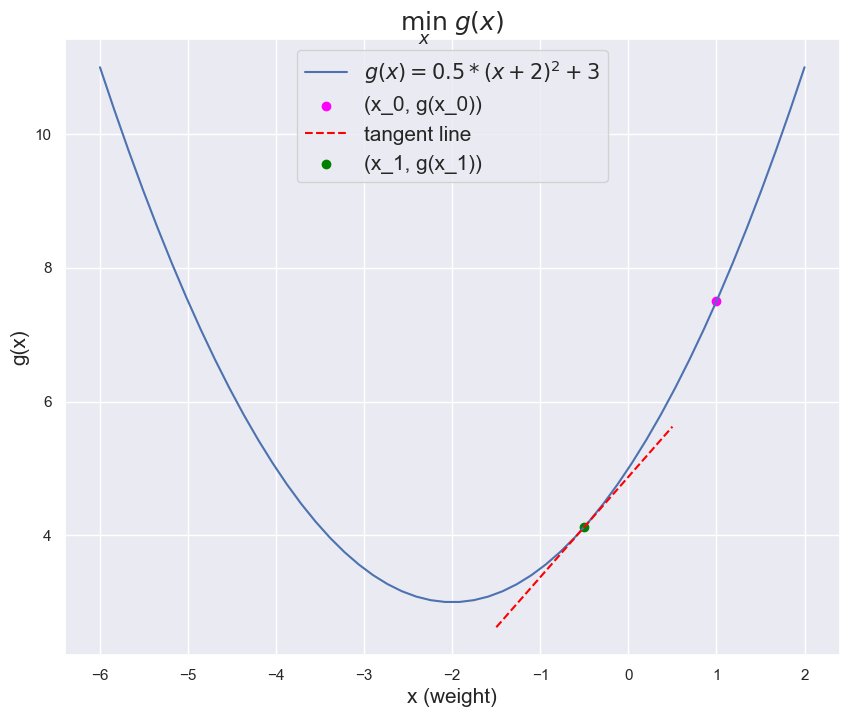

In [4]:
# Initialize choice of x
x_0 = 1.0

# Set learning rate 
alpha = 0.5

# Moving in the opposite direction of the derivative at x_0
x_1 = x_0 - alpha*dg(x_0)

# Print the sequence of x variables
print(f"{x_0 = }")
print(f"{x_1 = }")

# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, g(domain), label = "$g(x) = 0.5 * (x + 2)^2 + 3$")

# Visualize the tangent lines
tangent_line(x_0, g, dg, show = False)
tangent_line(x_1, g, dg, i = 1, color = "green")

# Plot labels
plt.xlabel("x (weight)", fontsize = 15)
plt.ylabel("g(x)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title("$\min_x$ $g(x)$", fontsize = 18)
plt.show()

Observe that the updated estimation $x_1$ provides a new pair $(x_1,g(x_1))$ that represents a superior selection for both an extremum and the minimum value within $g$ compared to the initial estimate $x_0$. This movement represents a descent along the function. Let's proceed further and explore our next position by executing the following code in the cell below.

x_0 = 1.0
x_1 = -0.5
x_2 = -1.25


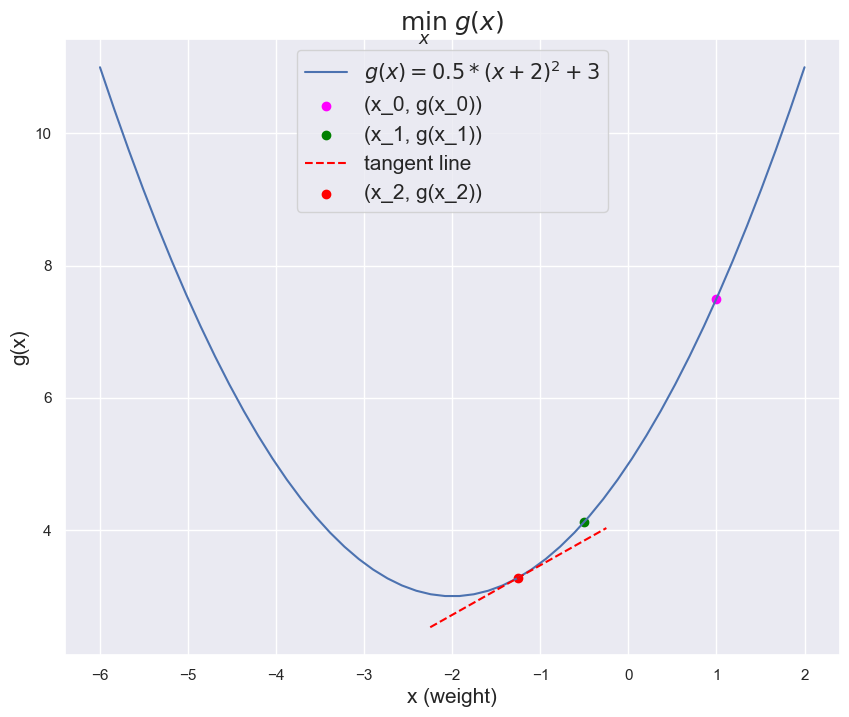

In [5]:
# Moving in the opposite direction of the derivative at x_1
x_2 = x_1 - alpha*dg(x_1)

# Print the sequence of x variables
print(f"{x_0 = }")
print(f"{x_1 = }")
print(f"{x_2 = }")

# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, g(domain), label = "$g(x) = 0.5 * (x + 2)^2 + 3$")

# Visualize the tangent lines
tangent_line(x_0, g, dg, show = False)
tangent_line(x_1, g, dg, i = 1, color = "green", show = False)
tangent_line(x_2, g, dg, i = 2, color = "red")

# Plot labels
plt.xlabel("x (weight)", fontsize = 15)
plt.ylabel("g(x)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title("$\min_x$ $g(x)$", fontsize = 18)
plt.show()

And once again by running the following code below:

x_0 = 1.0
x_1 = -0.5
x_2 = -1.25
x_3 = -1.625


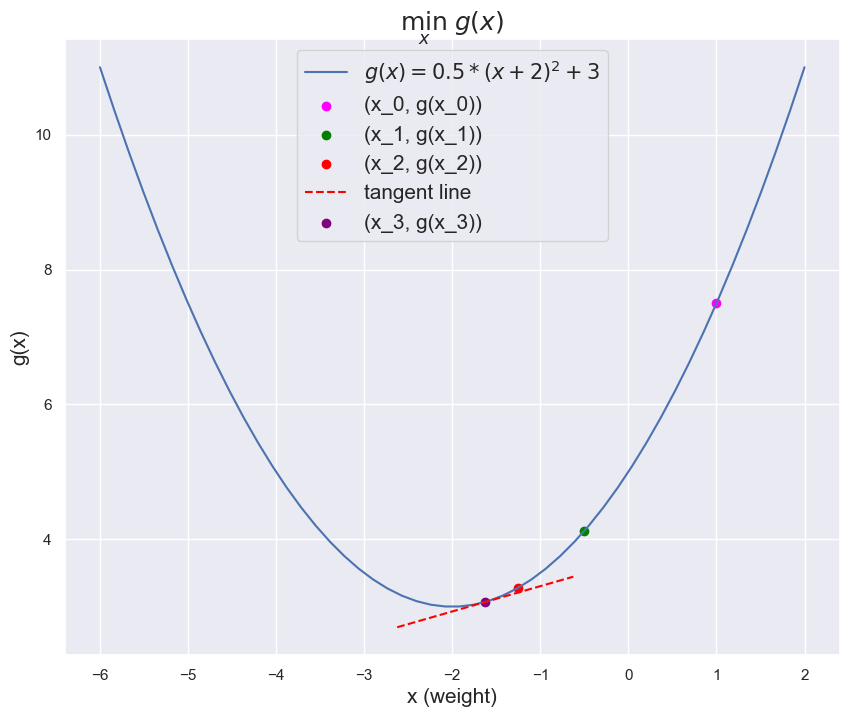

In [6]:
# Moving in the opposite direction of the derivative at x_2
x_3 = x_2 - alpha*dg(x_2)

# Print the sequence of w variables
print(f"{x_0 = }")
print(f"{x_1 = }")
print(f"{x_2 = }")
print(f"{x_3 = }")

# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, g(domain), label = "$g(x) = 0.5 * (x + 2)^2 + 3$")

# Visualize the tangent lines
tangent_line(x_0, g, dg, show = False)
tangent_line(x_1, g, dg, i = 1, color = "green", show = False)
tangent_line(x_2, g, dg, i = 2, color = "red", show = False)
tangent_line(x_3, g, dg, i = 3, color = "purple")

# Plot labels
plt.xlabel("x (weight)", fontsize = 15)
plt.ylabel("g(x)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title("$\min_x$ $g(x)$", fontsize = 18)
plt.show()

We can repeatedly perform this update process by creating a function named "derivative_descent." Feel free to execute the code provided in the cell below to witness this iterative process.

x_0 = 1.0 | dg(x_0) = 3.0
x_1 = -0.5 | dg(x_1) = 1.5
x_2 = -1.25 | dg(x_2) = 0.75
x_3 = -1.62 | dg(x_3) = 0.375
x_4 = -1.81 | dg(x_4) = 0.1875
x_5 = -1.91 | dg(x_5) = 0.09375
x_6 = -1.95 | dg(x_6) = 0.046875
x_7 = -1.98 | dg(x_7) = 0.0234375
x_8 = -1.99 | dg(x_8) = 0.01171875
x_9 = -1.99 | dg(x_9) = 0.005859375
x_10 = -2.0 | dg(x_10) = 0.0029296875
x_11 = -2.0 | dg(x_11) = 0.00146484375
x_12 = -2.0 | dg(x_12) = 0.000732421875



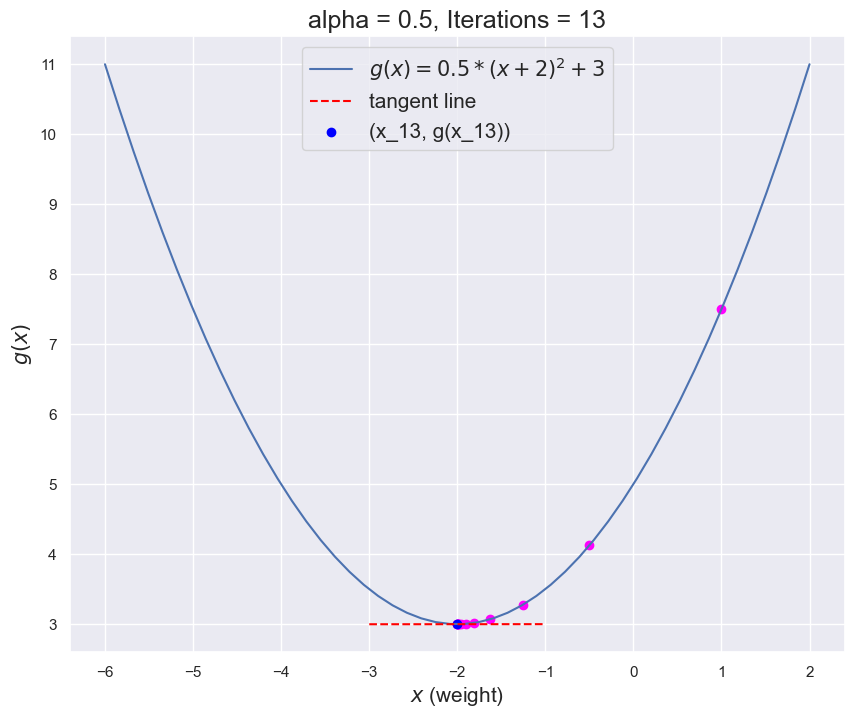

In [7]:
def derivative_descent(derivative, alpha = 0.5, x_0 = 1.0, max_iter = 1_000):
    """
    Perform derivative descent optimization to find the minimum of a function.

    Parameters:
    - derivative (callable): The derivative (gradient) function of the target function.
    - alpha (float, optional): The learning rate for the descent. Default is 0.5.
    - x_0 (float, optional): The initial guess for the minimum. Default is 1.0.
    - max_iter (int, optional): The maximum number of iterations. Default is 1000.

    Returns:
    - numpy.ndarray: Array containing the iterates of the optimization process.
    """
    
    X = [x_0]
    i = 0
    while abs(derivative(X[-1])) > 0.001 and i < max_iter:
        x_new = X[-1] - alpha*dg(X[-1])
        X.append(x_new)
        i += 1
    X = np.array(X)

    return X

X = derivative_descent(dg)

for i, x in enumerate(X):
    print(f"x_{i} = {np.round(x, decimals = 2)} | dg(x_{i}) = {dg(x)}")
print("")

# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, g(domain), label = "$g(x) = 0.5 * (x + 2)^2 + 3$")
plt.scatter(X, g(X), color = "magenta")
tangent_line(X[-1], g, dg, i = len(X), color = "blue")
plt.xlabel("$x$ (weight)", fontsize = 15)
plt.ylabel("$g(x)$", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title(f"alpha = {alpha}, Iterations = {len(X)}", fontsize = 18)
plt.show()

### Testing different choices of the Learning Rate 

We can evaluate the effectiveness of our selected learning rate
$α$ by comparing it against various alternatives for $α$. Execute the code provided in the cell below.

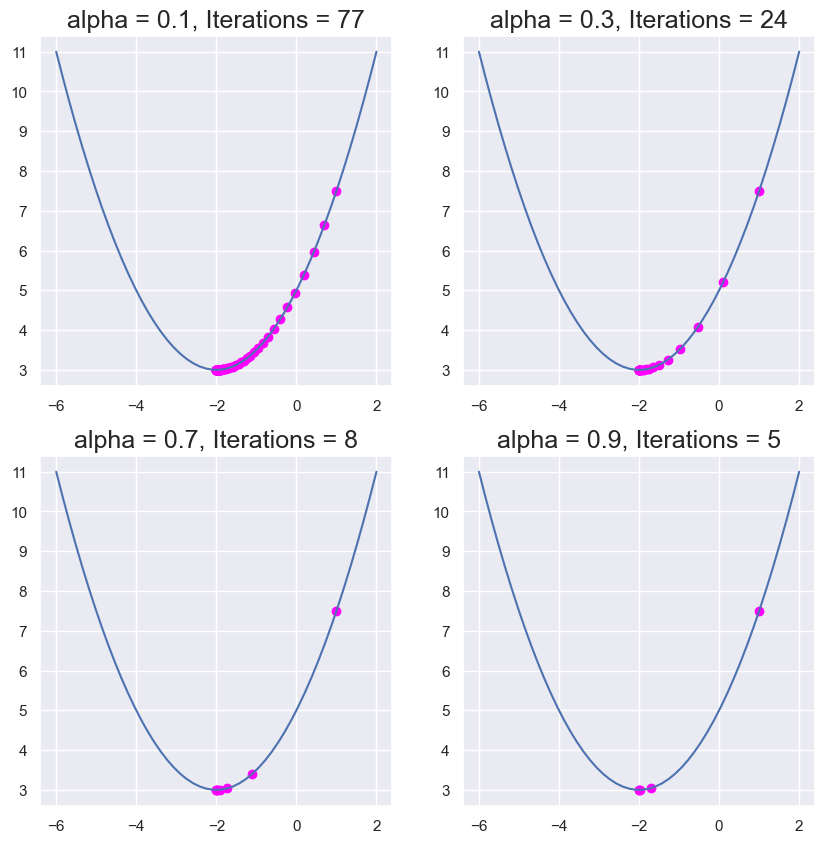

In [8]:
# Possible choices of learning rate 
alphas = [0.1, 0.3, 0.7, 0.9]

# Call the subplots method for plotting a grid of figures
fig, axs = plt.subplots(2, 2, figsize=(10,10))

# Loop over the axs and alpha values
for ax, alpha in zip(axs.flat, alphas):
    X = derivative_descent(dg, alpha = alpha)
    ax.plot(domain, g(domain))
    ax.scatter(X, g(X), color = "magenta")
    ax.set_title(f"alpha = {alpha}, Iterations = {len(X)}", fontsize = 18)

### Minimizing Functions of Several Variables

The concepts mentioned earlier naturally extend to functions involving multiple variables by replacing the single-variable derivative with the gradient.

We'll now address this problem specifically by considering a function with two variables, yet all concepts discussed apply seamlessly to functions with any finite number of variables. In a broader context, we can now articulate a meaningful definition for gradient descent.

\begin{equation}
    \text{True Gradient Descent: } x \leftarrow x - \alpha \nabla g(x)
    \label{eq:true_gradient_descent}
\end{equation}

Now that we've established this definition for multivariable gradient descent, let's delve into the multivariable function $g(x_0,x_1) = x_{0}^2+x_{1}^2+1$ which has an obvious minimum at the vector $\textbf{x}=[0.0,0.0]^T$. Execute the code below in the cell to create a visualization of this function.

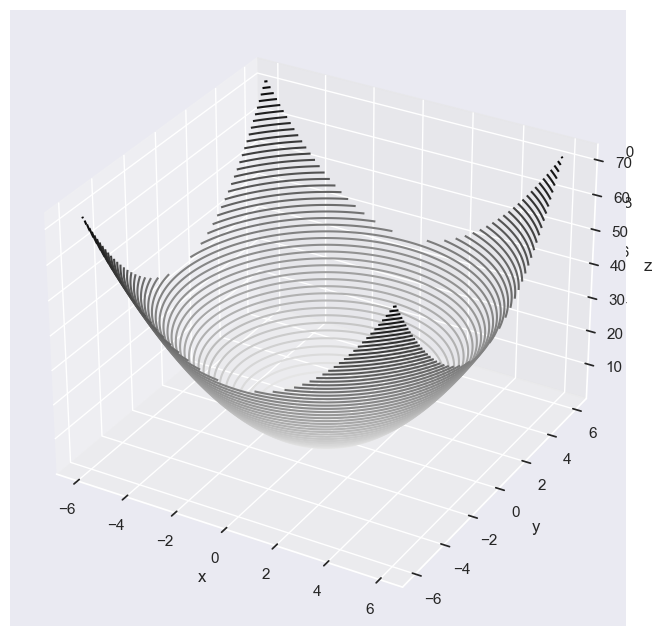

In [9]:
from mpl_toolkits import mplot3d

def g(x_0, x_1):
    return x_0 ** 2 + x_1 ** 2 + 1

x = np.linspace(-6, 6, 300)
y = np.linspace(-6, 6, 300)

X, Y = np.meshgrid(x, y)
Z = g(X, Y)

fig = plt.figure(figsize = (10, 8))
ax = plt.axes(projection='3d')
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

### True Gradient Descent

Our next step involves defining the function's derivative and adjusting our gradient descent function to accommodate such functions. Execute the following code in the cell below.

This will show the graph at a 2D angle.

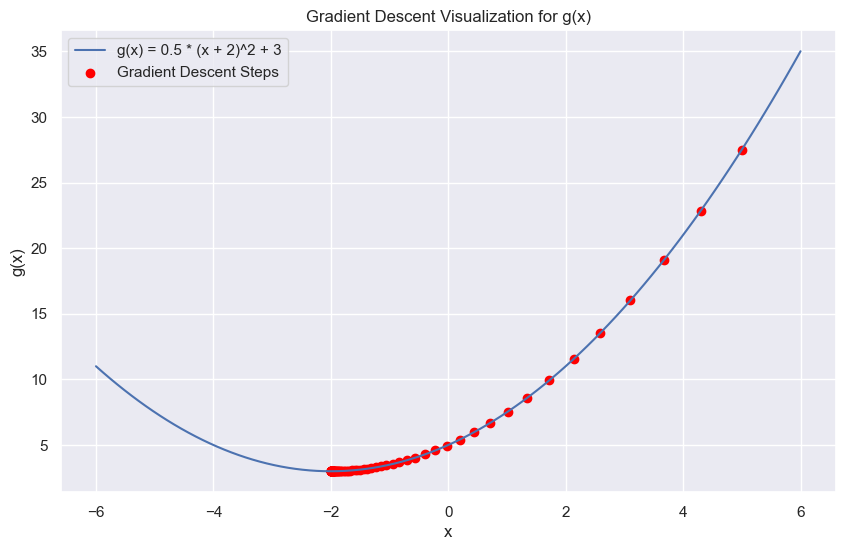

In [14]:
# Implement the gradient descent function for g(x)
def derivative_descent(derivative, alpha=0.5, x_0=1.0, max_iter=1000):
    X = [x_0]
    i = 0
    while abs(derivative(X[-1])) > 0.001 and i < max_iter:
        x_new = X[-1] - alpha * dg(X[-1])
        X.append(x_new)
        i += 1
    X = np.array(X)
    return X

# Perform gradient descent
X = derivative_descent(dg, alpha=0.1, x_0=5.0, max_iter=500)

# Create data for plotting g(x)
x = np.linspace(-6, 6, 100)
y = g(x_1)

# Plot the function g(x)
plt.figure(figsize=(10, 6))
plt.plot(x, g(x), label='g(x) = 0.5 * (x + 2)^2 + 3')

# Plot the gradient descent steps
plt.scatter(X, g(X), color='red', label='Gradient Descent Steps', marker='o')

# Label the axes and add a legend
plt.xlabel('x')
plt.ylabel('g(x)')
plt.legend()
plt.title('Gradient Descent Visualization for g(x)')
plt.grid(True)
plt.show()

This shows the graph at a 3D angle.

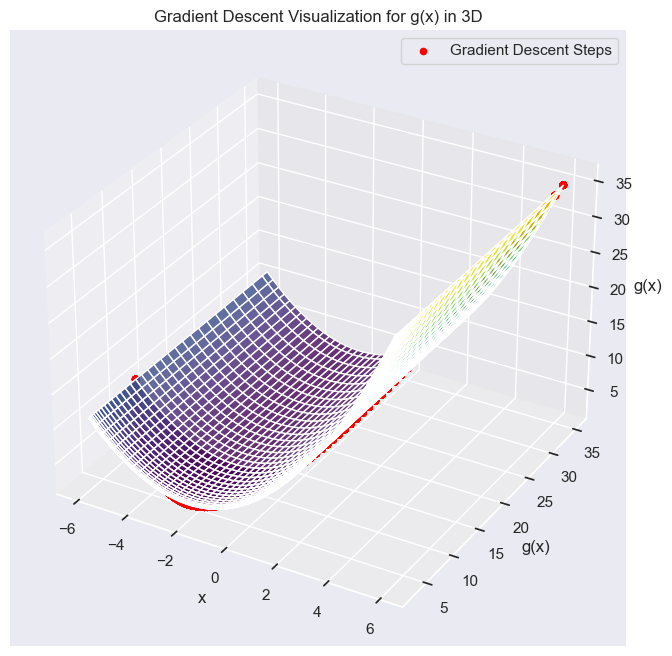

In [12]:
# Define the function g(x)
def g(x):
    return 0.5 * (x + 2)**2 + 3

# Define the derivative of g(x)
def dg(x):
    return x + 2

# Implement the derivative descent function for g(x)
def derivative_descent(derivative, alpha=0.5, x_0=1.0, max_iter=1000):
    X = [x_0]
    i = 0
    while abs(derivative(X[-1])) > 0.001 and i < max_iter:
        x_new = X[-1] - alpha * dg(X[-1])
        X.append(x_new)
        i += 1
    X = np.array(X)
    return X

# Perform gradient descent
X = derivative_descent(dg, alpha=0.1, x_0=5.0, max_iter=500)

# Create data for plotting g(x) in 3D
x = np.linspace(-6, 6, 100)
y = g(x)
X, Y = np.meshgrid(x, y)
Z = g(X)

# Plot the 3D surface of g(x)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

# Plot the gradient descent steps on the surface
ax.scatter(X, g(X), g(X), color='red', label='Gradient Descent Steps')

# Label the axes and add a legend
ax.set_xlabel('x')
ax.set_ylabel('g(x)')
ax.set_zlabel('g(x)')
ax.legend()
ax.set_title('Gradient Descent Visualization for g(x) in 3D')
plt.show()

# Conclusion

In this exploration, we've illustrated the effectiveness of gradient descent as an optimization technique, showcasing its application in iteratively minimizing convex functions. Through visualizations and iterative steps, we've delved into the mechanics of gradient descent, highlighting its role in seeking optimal solutions for functions. The flexibility of this method extends beyond convex functions, making it a valuable tool in various optimization scenarios.